<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 2 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Martin Salinas Scussolin; 201773557-0 ; Malla Nueva </h4>
    <h4> Jose Quezada Silva ; 201773528-7 ; Malla Nueva </h4>
</center>
<p>
<center><h4>Marzo 2019</h4></center>
</p>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 3 de Mayo.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**


---
**Esto es solo una sugerencia y no tendrá ningún impacto en su nota**

## Tip para Gráficos (Python)

Puede hacer sus gráficos un poco más estilosos utilizando la libreria seaborn

```python
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline #con esto no es necesario hacer plt.show()
```

El uso es igual que un gráfico de matplotlib, solo que ```sns.set()``` hace que se cargue la visualización de seaborn encima. [Informacion sobre seaborn.set()](https://seaborn.pydata.org/generated/seaborn.set.html)

## Tip para Gráficos (R)

Puede hacer sus gráficos un poco más estilosos utilizando la libreria [ggplot2](https://www.statmethods.net/advgraphs/ggplot2.html)


## Interactive Widgets

Si usted está trabajando en python puede hacer una widget interactiva que varíe los parámetros de una función, como se puede ver en el siguiente fragmento de código (debe ejecutarlo).

In [1]:
from ipywidgets import interact 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline 



<function __main__.plot_serie>

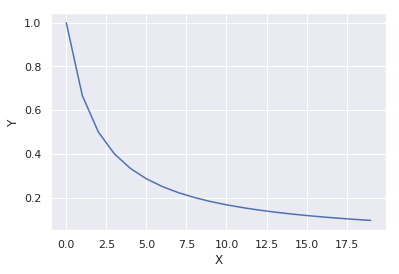

In [2]:
def plot_serie(x):
    values = np.arange(1,x,0.5)**2
    values2 = np.arange(1,x,0.5)**3
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.plot(values/values2)
        

interact(plot_serie,x=(2,20))

---
## 1. Retención de Clientes

La fuga (*churn*, término en inglés) de clientes es algo que muchas empresas de hoy en día sufren, la fuga puede deberse a muchos factores, uno de estos podría ser alguna característica del servicio en sí que provee la empresa. En esta sección usted trabajará con un dataset de "Telco", una empresa de telecomunicaciones, donde verá varios datos relacionados al plan de los clientes, uno de estos campos siendo "*Churn*", si el cliente se fugó o no. 

El archivo a utilizar es "churn.csv" y para información extra puede referirse a [este enlace](https://www.kaggle.com/blastchar/telco-customer-churn)

>a) Haga un análisis exploratorio **a su criterio** del dataset y extraiga 3 conclusiones acerca del conjunto de datos

In [3]:
import pandas as pd
import scipy as sc

In [4]:
#inclusion dataset
df = pd.read_csv("churn.csv") 

In [15]:
dfFemale = df.loc[(df["gender"] == 'Female')]                #size
dfMale = df.loc[(df["gender"] == 'Male')]

In [17]:
dfToPlotMale = pd.DataFrame(dfMale.groupby("tenure").size())
dfToPlotMale.columns=["Men"]

dfToPlotFemale = pd.DataFrame(dfFemale.groupby("tenure").size())
dfToPlotFemale.columns=["Women"]


In [18]:
dfToPlot = pd.concat([dfToPlotMale,
                      dfToPlotFemale],
                      sort=False,
                      axis=1)


In [24]:
dfToPlot.describe()[1:]

,Men,Women
mean,48.698630,47.780822
std,40.917154,37.016981
min,6.000000,5.000000
25%,33.000000,32.000000
50%,38.000000,38.000000
75%,50.000000,48.000000
max,329.000000,284.000000


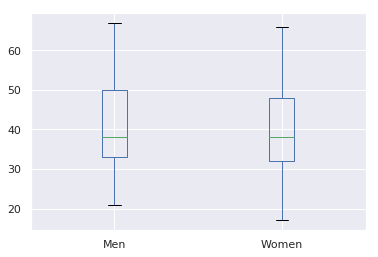

In [25]:
dfToPlot.boxplot(showfliers=False)

> b.1) Determine la probabilidad de que: <ul>
    <li>Un cliente sea mujer dado que tiene fibra óptica </li>
    <li>Un cliente sea hombre dado que tiene fibra óptica</li>
    <li>Un cliente sea mujer dado que no tiene fibra óptica</li>
    <li>Un cliente sea hombre dado que no tiene fibra óptica</li>
    </ul>
    Además indique cuál/es de estos pares deben sumar 1 (Si es que algún par debe sumar esta cantidad). Justifique su respuesta.
    

In [47]:
class probs:

    opticFiber = len(df.loc[df["InternetService"] == "Fiber optic"])/len(df)
    notOpticFiber = len(df.loc[df["InternetService"] != "Fiber optic"])/len(df)
    
    women = len(df.loc[(df["gender"] == "Female")])/len(df)
    womenOF = len(df.loc[(df["gender"] == "Female") & (df["InternetService"] == "Fiber optic")])/len(df)
    womenNotOf = len(df.loc[(df["gender"] == "Female") & (df["InternetService"] != "Fiber optic")])/len(df)
   
    men = len(df.loc[(df["gender"] == "Male")])/len(df)
    menOF = len(df.loc[(df["gender"] == "Male") & (df["InternetService"] == "Fiber optic")])/len(df)
    menNotOf = len(df.loc[(df["gender"] == "Male") & (df["InternetService"] != "Fiber optic")])/len(df)
    
def p_A_if_B(a,b):
    return a/b

def Bayes(a,b,c):
    return (a*b/c)

In [48]:
#round(probabilities.women,2)
print(p_A_if_B(probs.womenOF, probs.opticFiber))
print(p_A_if_B(probs.menOF, probs.opticFiber))
print(p_A_if_B(probs.womenNotOf, probs.notOpticFiber))
print(p_A_if_B(probs.menNotOf, probs.notOpticFiber))

0.5016149870801033
0.4983850129198967
0.49024575627058525
0.5097542437294148


>b.2) ¿Es posible concluir que si un cliente es hombre tiene más probabilidad de tener fibra óptica? ¿Y si es mujer? ¿Por qué?

>Por Bayes

In [49]:
print(Bayes(p_A_if_B(probs.menOF, probs.opticFiber),probs.opticFiber,probs.men))

0.4340365682137834


In [50]:
print(Bayes(p_A_if_B(probs.womenOF, probs.opticFiber),probs.opticFiber,probs.women))

0.4452408256880734


>c) Utilizando criterios de probabilidad condicional ¿Hay algún servicio de internet más propenso a la fuga?

In [55]:
class probs2:
    
    IntChurn = len(df.loc[(df["Churn"] == "Yes") & (df["InternetService"] != "No") ])
    IntDSL = len(df.loc[(df["InternetService"] == "DSL")])
    IntDSLChurn = len(df.loc[(df["InternetService"] == "DSL") & (df["Churn"] == "Yes")])
    
    IntOf = len(df.loc[(df["InternetService"] == "Fiber optic")])
    IntOfChurn = len(df.loc[(df["InternetService"] == "Fiber optic") & (df["Churn"] == "Yes")])


In [56]:
p_A_if_B(probs2.IntDSLChurn,probs2.IntDSL)

0.1895910780669145

In [57]:
p_A_if_B(probs2.IntOfChurn,probs2.IntOf)

0.4189276485788114

>d) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la fuga? y ¿es la fuga un buen predictor del cargo mensual de un cliente?

#### Se obtienen rangos de cargo mensual

In [77]:
df["MonthlyCharges"].groupby(pd.cut(df["MonthlyCharges"],bins=np.arange(18.25,118.75,20))).sum()#.tolist()

MonthlyCharges
(18.25, 38.25]      40416.35
(38.25, 58.25]      49396.00
(58.25, 78.25]      93648.70
(78.25, 98.25]     159553.15
(98.25, 118.25]    112491.20
Name: MonthlyCharges, dtype: float64

In [62]:
class probs3:
      
    ChurnThot = len(df.loc[(df["Churn"] == "Yes")])
    
    p1 = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25) & (df["Churn"] == "Yes")])
    p2 = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25) & (df["Churn"] == "Yes")])
    p3 = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25) & (df["Churn"] == "Yes")])
    p4 = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25) & (df["Churn"] == "Yes")])
    p5 = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25) & (df["Churn"] == "Yes")])
    
    mOne = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25)])
    mTwo = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25)])
    mThree = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25)])
    mFour = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25)])
    mFive = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25)])

class probs4:
    P1 = Bayes(p_A_if_B(probs3.p1,probs3.mOne),probs3.mOne, probs3.ChurnThot)
    P2 = Bayes(p_A_if_B(probs3.p2,probs3.mTwo), probs3.mTwo, probs3.ChurnThot)
    P3 = Bayes(p_A_if_B(probs3.p3,probs3.mThree), probs3.mThree, probs3.ChurnThot)
    P4 = Bayes(p_A_if_B(probs3.p4,probs3.mFour), probs3.mFour, probs3.ChurnThot)
    P5 = Bayes(p_A_if_B(probs3.p5,probs3.mFive), probs3.mFive, probs3.ChurnThot)

In [59]:
print(probs3.p1/probs3.mOne)
print(probs3.p2/probs3.mTwo)
print(probs3.p3/probs3.mThree)
print(probs3.p4/probs3.mFour)
print(probs3.p5/probs3.mFive)

0.11414253897550111
0.2715430861723447
0.2921597633136095
0.3667763157894737
0.30740393626991563


In [66]:
print(probs4.P1)
print(probs4.P2)
print(probs4.P3)
print(probs4.P4)
print(probs4.P5)

0.10968432316746923
0.14499732477260568
0.21134296415195292
0.3579454253611557
0.17549491706795078


# NO

>e) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la estadia de un cliente? y ¿es la estadia del cliente un buen predictor del cargo mensual de este?

*Estadia*: tenure

In [101]:
df["MonthlyCharges"].groupby(pd.cut(df["MonthlyCharges"],bins=np.arange(18.25,118.75,))).sum()#.tolist()
df["tenure"].groupby(pd.cut(df["tenure"],bins=np.arange(0,73,36))).sum()#.tolist()

tenure
(0, 36]      54377
(36, 72]    173613
Name: tenure, dtype: int64

In [116]:
class probs5:
    p1_lt = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25) & (df["tenure"] <= 36)])
    p1_ht = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25) & (df["tenure"] > 36)])
    
    p2_lt = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25) & (df["tenure"] <= 36)])
    p2_ht = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25) & (df["tenure"] > 36)])
    
    p3_lt = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25) & (df["tenure"] <= 36)])
    p3_ht = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25) & (df["tenure"] > 36)])
    
    p4_lt = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25) & (df["tenure"] <= 36)])
    p4_ht = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25) & (df["tenure"] > 36)])
    
    p5_lt = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25) & (df["tenure"] <= 36)])
    p5_ht = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25) & (df["tenure"] > 36)])
    
    

In [117]:
probs5.p1_lt
probs5.p1_ht

probs5.p2_lt
probs5.p2_ht

probs5.p3_lt
probs5.p3_ht

probs5.p4_lt
probs5.p4_ht

probs5.p5_lt
probs5.p5_ht

print("LOW")
print(probs5.p1_lt/probs3.mOne)
print(probs5.p2_lt/probs3.mTwo)
print(probs5.p3_lt/probs3.mThree)
print(probs5.p4_lt/probs3.mFour)
print(probs5.p5_lt/probs3.mFive,"\n")

print("HIGH")
print(probs5.p1_ht/probs3.mOne)
print(probs5.p2_ht/probs3.mTwo)
print(probs5.p3_ht/probs3.mThree)
print(probs5.p4_ht/probs3.mFour)
print(probs5.p5_ht/probs3.mFive)

LOW
0.6375278396436526
0.7234468937875751
0.6427514792899408
0.5696271929824561
0.2492970946579194 

HIGH
0.36247216035634744
0.27655310621242485
0.3572485207100592
0.4303728070175439
0.7507029053420806


## 2. Máquina de Rube Goldberg

Una máquina de Rube Goldberg es un artefacto extremadamente complejo que realiza una tarea fácil. Usted, en su tiempo libre, decidió construir uno de estos artefactos que consta de 5 etapas:

<ol>
    <li>Lanza una bolita que rueda por un riel con una probabilidad de $\dfrac{2}{5}$ de caerse</li>
    <li>Después de rodar por el riel cae en una catapulta que la lanza en la dirección correcta el $60\%$ de las veces</li>
    <li>Impacta contra una tela que le frena el impulso y la hace caer sobre el interruptor de un ventilador, el $80\%$ de las veces es capaz de activar el ventilador</li>
    <li>Cuando el ventilador se activa empuja un barco de juguete en una fuente con agua hasta el otro extremo de esta para empujar otra bolita, el barco llega con suficiente impulso con una probabilidad de $\dfrac{6}{9}$</li>
    <li>Esta bolita rueda por otro riel y cae sobre el control remoto que enciende su televisor, en un $30\%$ de las veces logra encenderlo</li>
</ol>

>a) Usted quiere subir su máquina de Rube Goldberg a Youtube™, estime cuántas veces (en promedio) tendrá que poner en marcha su máquina hasta que resulte por primera vez en video. A su vez, haga un gráfico mostrando la probabilidad de no tener éxito en función del número de puestas en marcha de la máquina y comente.

> b) Si usted cuenta con 1000 bolitas, estime tanto téorica como empíricamente cuántas bolitas fallan en cada estapa. Compare sus resultados obtenidos.

*Recuerde que habrá una cantidad de bolitas que no fallarán*

> c) Determine la función de probabilidad que rige este fenómeno según todos los estados posibles de la bolita

>d) Genere 1000 valores aleatorios que sigan la función de probabilidad que encontró en c), haga un histograma y compare con lo obtenido en b)

## 3. Perritos Enfermos

Usted trabaja en un refugio de animales que se especializa en recibir perros, además de contar con el equipo necesario para tratar con enfermedades que estos puedan presentar. Viendo las noticias se enteró que un virus sumamente peligroso para los perros se está expandiendo rápidamente por la zona y sospecha que algunos de los perros bajo su cuidado pueden estar infectados pero, no presentan un síntoma de momento. Para suerte suya este virus tiene cura hace tiempo y cuenta con el equipo para analizar muestras de saliva para detectar qué perro está infectado con el virus o no.

Usted tiene 500 perros, para no hacer la prueba 1 a 1 ha decidido juntar muestras de saliva en grupos de $K$ perros (con $K$ siendo un divisor de 500), y en caso de que el examen arroje positivo hará la prueba 1 a 1 del grupo. Asuma que 8 perros están infectados, pero usted no sabe esto a priori.

>a) ¿Es posible determinar **teóricamente** un $K$ tal que la cantidad de veces que se realiza la prueba sea la menor posible? De ser así, encuentre dicho K. ¿Qué distribución es comparable a este fenómeno?

In [ ]:
#NORMAL AAAHH
K E {1,2,4,5,10,20,25,50,100,125,250,500}
#en ese caso estaría por la mitad aprox ...mmmmmmgrdsrgklsdgñ

>b) Encuentre **empíricamente** un valor de $K$ que minimice la cantidad de veces que se realiza la prueba y compare con el obtenido en b)

>c) Ahora usted conoce la cantidad de perros infectados, realice el mismo experimento que en b) y compare sus resultados. ¿A qué se debe esta diferencia? 

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día 27 de Abril a las 15hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)